# Trip Advisory Predictive Model

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

In [87]:
data = pd.read_excel('Potential datasets for recruitment.xlsx', 'Dataset 1')
data.head(3)
# # data.info()


,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday


# Encoding Categorical and Binary Features

In [90]:
from sklearn.preprocessing import LabelEncoder
#extracting categorical features
cat_fet_df = data.iloc[:, [0, 6,7,8,9,10,11,12, 16, 18, 19]]
#encoding  categorical features using label encoder
cat_fet_en_df = cat_fet_df.apply(LabelEncoder().fit_transform)
#extracting numerical features
num_fet_df = data.iloc[:, [1, 2, 3, 4, 14, 15, 17,]]
#concatenating encoded categorical, binary and numerical features
new_df_en = pd.concat([num_fet_df, cat_fet_en_df], axis = 1)
new_df_en.head()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years,User country,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,User continent,Review month,Review weekday
0,11,4,13,5,3,3773,9,46,3,0,1,0,0,1,1,3,4,4
1,119,21,75,3,3,3773,3,46,0,0,1,0,0,1,1,3,4,0
2,36,9,25,5,3,3773,2,46,2,0,1,0,0,1,1,3,3,2
3,14,7,14,4,3,3773,6,45,3,0,1,0,0,1,1,2,3,0
4,5,5,2,4,3,3773,7,3,4,0,1,0,0,1,1,3,7,5


In [103]:
new_df_en.describe()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years,User country,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,User continent,Review month,Review weekday
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,4.190476,2196.380952,4.359127,31.688492,1.539683,0.952381,0.952381,0.238095,0.761905,0.904762,0.952381,2.690476,5.500000,3.144841
std,74.996426,23.957953,48.520783,1.007302,0.732265,1285.476807,2.925856,18.500233,1.074932,0.213170,0.213170,0.426341,0.426341,0.293835,0.213170,0.829038,3.455482,2.032747
min,1.000000,0.000000,0.000000,1.000000,3.000000,188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,5.000000,8.000000,4.000000,4.000000,826.000000,2.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.750000,1.000000
50%,23.500000,9.000000,16.000000,4.000000,4.000000,2700.000000,4.000000,45.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,5.500000,3.000000
75%,54.250000,18.000000,35.000000,5.000000,5.000000,3025.000000,6.000000,46.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,8.250000,5.000000
max,775.000000,263.000000,365.000000,5.000000,5.000000,4027.000000,13.000000,47.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,11.000000,6.000000


looking at the unique values that our dataset has assumed

In [93]:
for col in new_df_en.columns:
    print("\nunique values of "+col+"\n")
    print(new_df_en[col].unique())


unique values of Nr. reviews

[ 11 119  36  14   5  31  45   2  24  12 102  20   7  22   3 146   8   9
  41  10   4  18  29 114  30  87  26  56  13  58  70   6 290  47  35  74
  34 576 418  73  63  54  33 156  19  23   1  21  17  43  15  16  27  97
  78  79  88  39 130  50 161 153  46  25  59  48 127 113 103  28  32  37
  66  57  42  75  91  52  93 252 164 125  67  40 142  69  49 775  38 136
 110  53 320 235 184 262  92 131 148 139 333  85 169  60 106 112 160 372
  84  95 118 275 240  62 159  86  64 167 608 108  55  65  61  82 116 415
  76 182 289 101  83  44  77 121 137 123 189  96 154]

unique values of Nr. hotel reviews

[  4  21   9   7   5   8  12   1   3  24   6  17  11  42  18  10  27 263
   0  47  43  32  13  15  19 126  14  20  31  16  39  41  78  33  38  22
  56  40  23  30  48  25  55  35  46  58  52  45 111  75  61  49  37  34
 107  79  76  71 117  44 162  28  26  72]

unique values of Helpful votes

[ 13  75  25  14   2  27  46   4   8  11  58  24   9   0  33   1  19  26


# Imputation of values

In [100]:
#accessing the errorous values in our feature "Score"
new_df_en.iloc[:, 4] = pd.to_numeric(new_df_en.iloc[:, 4], errors='coerce')
#imputing errorous values with the median value
new_df_en.fillna(new_df_en.median(axis=0), inplace=True)
print("unique values of Score now: ",new_df_en['Hotel stars'].unique())

# only single instance of dataset hold errorous value for "Member year" so, this value can be easilly imputed as
new_df_en.iloc[75, 6] = new_df_en['Member years'].median()
print("unique values of Member years now : ",new_df_en['Member years'].unique())

unique values of Score now:  [3. 4. 5.]
unique values of Member years now :  [ 9.  3.  2.  6.  7.  4.  0.  5.  1. 10. 11.  8. 12. 13.]


# Data Visualization

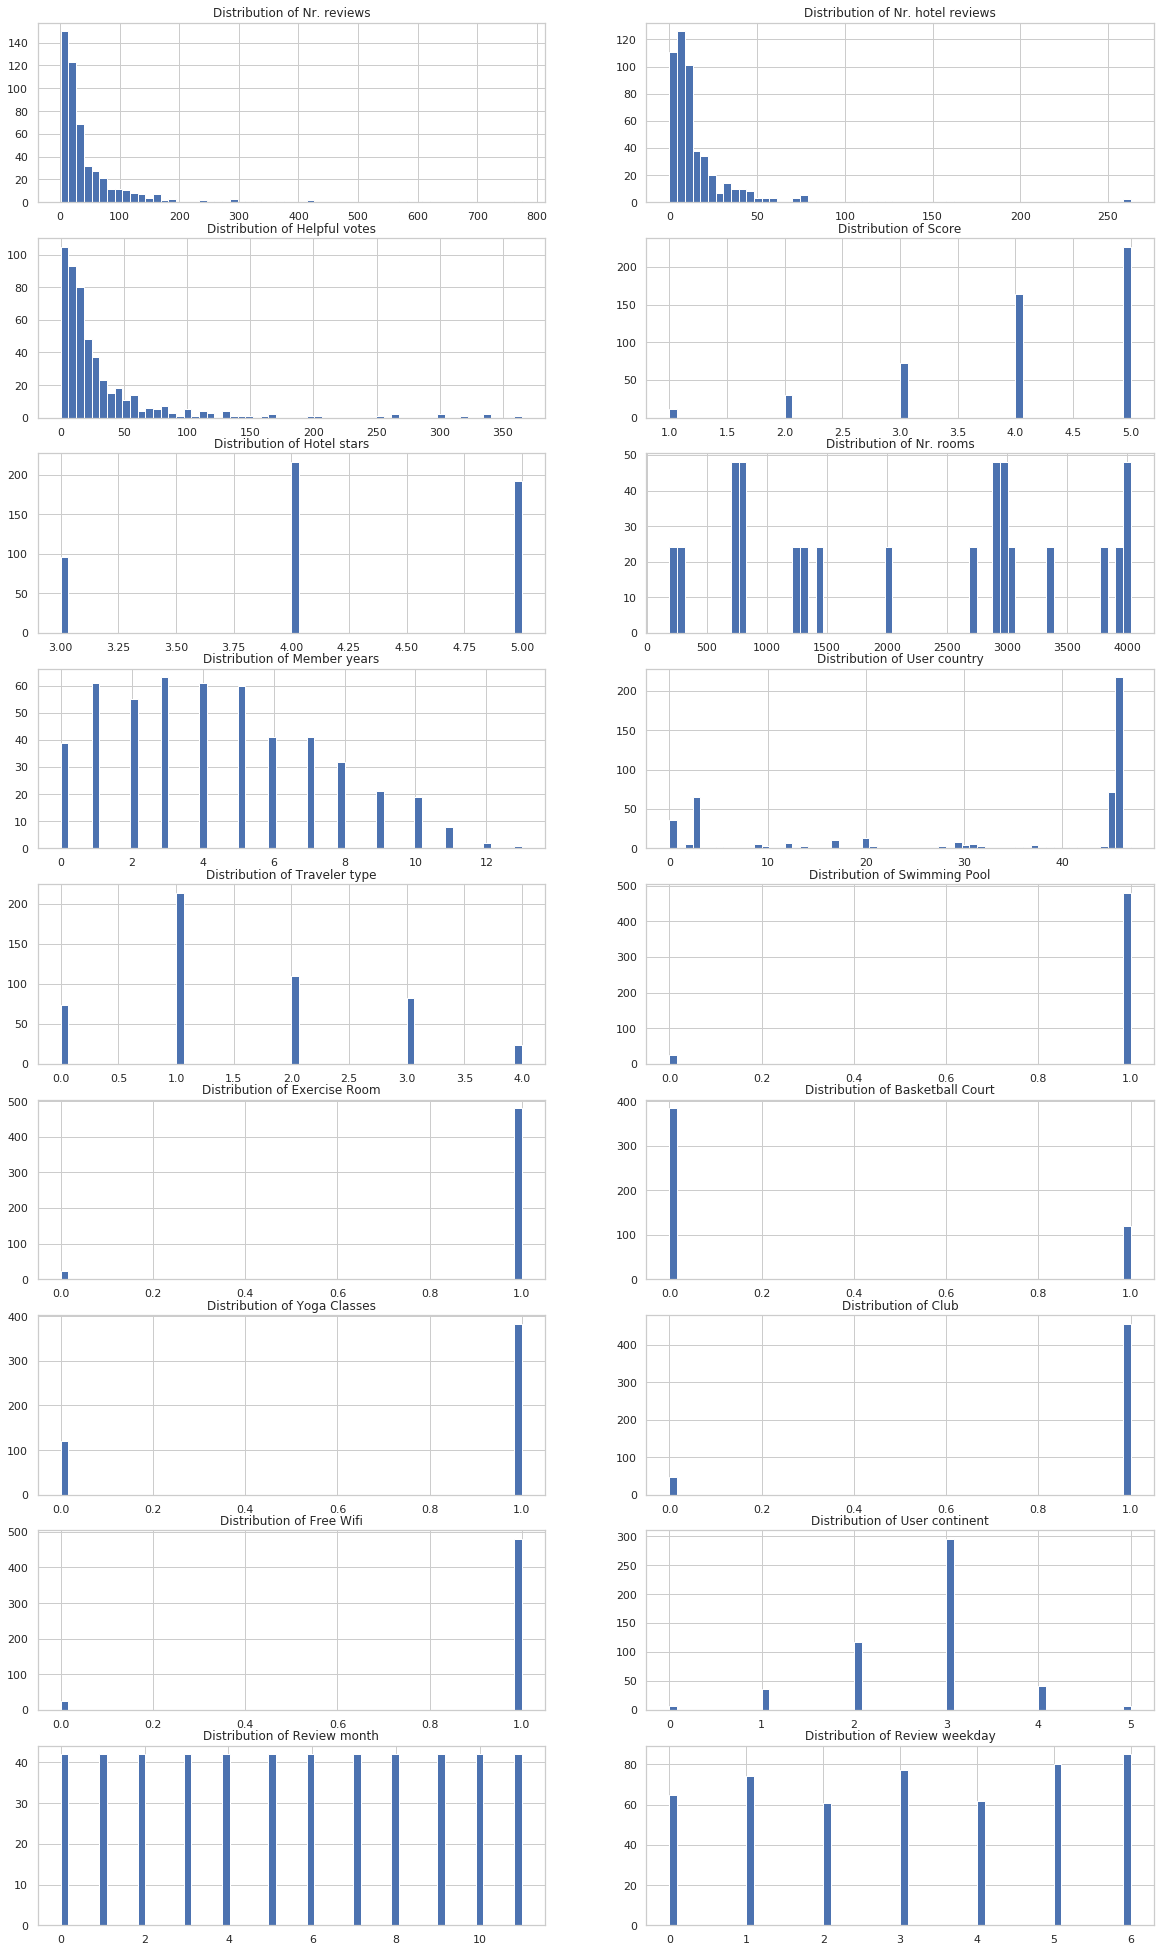

In [109]:
import seaborn as sns
fig = plt.figure(figsize=(20,35))
ax = fig.gca()
sns.set_style("whitegrid")
cols = new_df_en.columns
j = 1
for col in cols:
    plt.subplot(9,2,j)
    j = j + 1
    #sns.kdeplot(new_df_en[col], ax = ax)
    plt.hist(new_df_en[col], bins=60)
    plt.title("Distribution of "+col)

In [112]:
from sklearn import preprocessing
#stand_features = features.values
#scaler = preprocessing.StandardScaler().fit(trans_features)
# new_df_en_stand = scaler.transform(new_df_en)
# stand_features_df = pd.DataFrame(stand_features)
temp = new_df_en.iloc[:, [0, 1, 2]]
temp_std = preprocessing.MinMaxScaler().fit(temp).transform(temp)
temp_std = pd.DataFrame(temp_std)
temp_std.head()
list = ['Nr. reviews', 'Nr. hotel reviews', 'Helpful votes']
new_df_en_stand = new_df_en.drop(list, axis=1)
new_df_en_stand.head()
new_df_en_stand = pd.concat([temp_std, new_df_en_stand], axis=1)
new_df_en.head()

/home/juned/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years,User country,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,User continent,Review month,Review weekday
0,11,4,13,5,3.0,3773,9.0,46,3,0,1,0,0,1,1,3,4,4
1,119,21,75,3,3.0,3773,3.0,46,0,0,1,0,0,1,1,3,4,0
2,36,9,25,5,3.0,3773,2.0,46,2,0,1,0,0,1,1,3,3,2
3,14,7,14,4,3.0,3773,6.0,45,3,0,1,0,0,1,1,2,3,0
4,5,5,2,4,3.0,3773,7.0,3,4,0,1,0,0,1,1,3,7,5


In [111]:
new_df_en_stand.head()

,0,1,2,Score,Hotel stars,Nr. rooms,Member years,User country,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,User continent,Review month,Review weekday
0,0.012920,0.015209,0.035616,5,3.0,3773,9.0,46,3,0,1,0,0,1,1,3,4,4
1,0.152455,0.079848,0.205479,3,3.0,3773,3.0,46,0,0,1,0,0,1,1,3,4,0
2,0.045220,0.034221,0.068493,5,3.0,3773,2.0,46,2,0,1,0,0,1,1,3,3,2
3,0.016796,0.026616,0.038356,4,3.0,3773,6.0,45,3,0,1,0,0,1,1,2,3,0
4,0.005168,0.019011,0.005479,4,3.0,3773,7.0,3,4,0,1,0,0,1,1,3,7,5


In [ ]:
new_df_en.head()

In [25]:
#extracting features and target in to seperate dataframes
target = new_df_en.iloc[:,3]
features = new_df_en.drop('Score', axis=1)
features.head()
# target.head()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Hotel stars,Nr. rooms,Member years,User country,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,User continent,Review month,Review weekday
0,11,4,13,3.0,3773,9.0,46,3,0,1,0,0,1,1,3,4,4
1,119,21,75,3.0,3773,3.0,46,0,0,1,0,0,1,1,3,4,0
2,36,9,25,3.0,3773,2.0,46,2,0,1,0,0,1,1,3,3,2
3,14,7,14,3.0,3773,6.0,45,3,0,1,0,0,1,1,2,3,0
4,5,5,2,3.0,3773,7.0,3,4,0,1,0,0,1,1,3,7,5


In [118]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring=None, obj_line=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 50)):
    
    from sklearn.model_selection import learning_curve
    import numpy as np
    from matplotlib import pyplot as plt
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '-', color="g",
             label="Cross-validation score")
    
    if obj_line:
        plt.axhline(y=obj_line, color='blue')

    plt.legend(loc="best")
    return plt


In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(poly_features, target, test_size=0.3)

In [160]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.model_selection import cross_val_score
classifier =  GaussianNB()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
score_testing = classifier.score(x_test,y_test)
score_training = classifier.score(x_train,y_train)
accuracy_score(y_test, y_pred)
r = recall_score(y_test, y_pred, average='macro')
p = precision_score(y_test, y_pred, average='macro')
cv = cross_val_score(classifier, features, target, cv=10)
print('accuracy_score            : ', accuracy_score(y_test, y_pred))
print('f1_score                  : ', 2*r*p/(r+p))
print('classifier training score : ', score_training)
print('classifier testing score  : ', score_testing)
print('cross validation score    : ', cv.mean())

accuracy_score            :  0.08552631578947369
f1_score                  :  0.22172289206522658
classifier training score :  0.10511363636363637
classifier testing score  :  0.08552631578947369
cross validation score    :  0.31456857227651586


<module 'matplotlib.pyplot' from '/home/juned/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

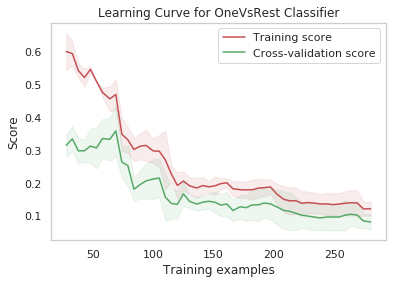

In [161]:
plot_learning_curve(estimator = classifier, title = "Learning Curve for OneVsRest Classifier",
                    X = x_train, y = y_train, cv = 5)

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
classifier =  DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
score_testing = classifier.score(x_test,y_test)
score_training = classifier.score(x_train,y_train)
accuracy_score(y_test, y_pred)
r = recall_score(y_test, y_pred, average='macro')
p = precision_score(y_test, y_pred, average='macro')
cv = cross_val_score(classifier, features, target, cv=10)
print('accuracy_score            : ', accuracy_score(y_test, y_pred))
print('f1_score                  : ', 2*r*p/(r+p))
print('classifier training score : ', score_training)
print('classifier testing score  : ', score_testing)
print('cross validation score    : ', cv.mean())

accuracy_score            :  0.48026315789473684
f1_score                  :  0.27434799541669397
classifier training score :  1.0
classifier testing score  :  0.48026315789473684
cross validation score    :  0.289232042308941


<module 'matplotlib.pyplot' from '/home/juned/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

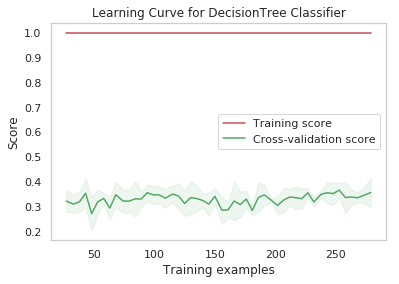

In [137]:
plot_learning_curve(estimator = classifier, title = "Learning Curve for DecisionTree Classifier",
                    X = x_train, y = y_train, cv = 5)

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
classifier =  RandomForestClassifier(n_estimators=100)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
score_testing = classifier.score(x_test,y_test)
score_training = classifier.score(x_train,y_train)
accuracy_score(y_test, y_pred)
r = recall_score(y_test, y_pred, average='macro')
p = precision_score(y_test, y_pred, average='macro')
cv = cross_val_score(classifier, features, target, cv=10)
print('accuracy_score            : ', accuracy_score(y_test, y_pred))
print('f1_score                  : ', 2*r*p/(r+p))
print('classifier training score : ', score_training)
print('classifier testing score  : ', score_testing)
print('cross validation score    : ', cv.mean())

/home/juned/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy_score            :  0.46710526315789475
f1_score                  :  0.2318744618272928
classifier training score :  1.0
classifier testing score  :  0.46710526315789475
cross validation score    :  0.3376380311195596


<module 'matplotlib.pyplot' from '/home/juned/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

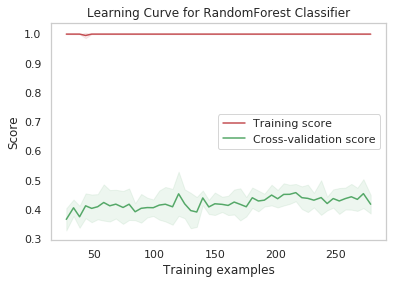

In [156]:
plot_learning_curve(estimator = classifier, title = "Learning Curve for RandomForest Classifier",
                    X = x_train, y = y_train, cv = 5)

In [162]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
classifier = OneVsRestClassifier(SVC(kernel='rbf', gamma='scale'))
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
score_testing = classifier.score(x_test,y_test)
score_training = classifier.score(x_train,y_train)
accuracy_score(y_test, y_pred)
r = recall_score(y_test, y_pred, average='macro')
p = precision_score(y_test, y_pred, average='macro')
cv = cross_val_score(classifier, features, target, cv=10)
print('accuracy_score            : ', accuracy_score(y_test, y_pred))
print('f1_score                  : ', 2*r*p/(r+p))
print('classifier training score : ', score_training)
print('classifier testing score  : ', score_testing)
print('cross validation score    : ', cv.mean())

/home/juned/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy_score            :  0.4473684210526316
f1_score                  :  0.2333313908160935
classifier training score :  0.9744318181818182
classifier testing score  :  0.4473684210526316
cross validation score    :  0.2819590268618333


<module 'matplotlib.pyplot' from '/home/juned/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

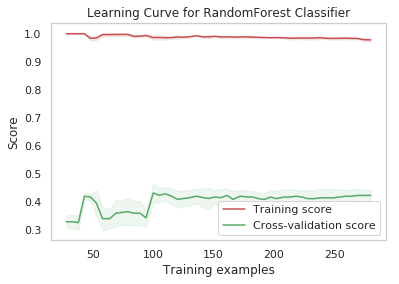

In [163]:
plot_learning_curve(estimator = classifier, title = "Learning Curve for RandomForest Classifier",
                    X = x_train, y = y_train, cv = 5)

In [153]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.2 * (1 - .2)))
sel.fit(features)
sel_features = sel.transform(features)
sel_features = pd.DataFrame(sel_features)
sel_features.shape
sel_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,11.0,4.0,13.0,3.0,3773.0,9.0,46.0,3.0,0.0,0.0,3.0,4.0,4.0
1,119.0,21.0,75.0,3.0,3773.0,3.0,46.0,0.0,0.0,0.0,3.0,4.0,0.0
2,36.0,9.0,25.0,3.0,3773.0,2.0,46.0,2.0,0.0,0.0,3.0,3.0,2.0
3,14.0,7.0,14.0,3.0,3773.0,6.0,45.0,3.0,0.0,0.0,2.0,3.0,0.0
4,5.0,5.0,2.0,3.0,3773.0,7.0,3.0,4.0,0.0,0.0,3.0,7.0,5.0


In [82]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
sel = SelectKBest(chi2, k=2)
sel_features = sel.fit(features, target).transform(features)
sel_features.shape

(504, 2)

In [157]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly_features = poly.fit_transform(sel_features)
poly_features.shape

(504, 105)